

!pip install numpy
!pip install matplotlib.pyplot
!pip install pandas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('pseudosalarydata.csv')
data.head()

,EmployeeID,Name,Department,Salary,ExperienceYears
0,1,Employee_1,Finance,113104,2
1,2,Employee_2,Marketing,83707,20
2,3,Employee_3,HR,115305,15
3,4,Employee_4,Finance,58693,7
4,5,Employee_5,Finance,101932,12


In [6]:
data.info()

missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       30 non-null     int64 
 1   Name             30 non-null     object
 2   Department       30 non-null     object
 3   Salary           30 non-null     int64 
 4   ExperienceYears  30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB
Missing values per column:
 EmployeeID         0
Name               0
Department         0
Salary             0
ExperienceYears    0
dtype: int64


,EmployeeID,Salary,ExperienceYears
count,30.000000,30.000000,30.000000
mean,15.500000,80678.366667,10.200000
std,8.803408,28119.200314,5.585696
min,1.000000,32747.000000,2.000000
25%,8.250000,56416.750000,4.500000
50%,15.500000,88018.000000,10.000000
75%,22.750000,103459.750000,15.000000
max,30.000000,117313.000000,20.000000


In [7]:
grouped_data = data.groupby('Department')

for department, group in grouped_data:
    print(f"Department: {department}")
    print(group.head())  # Display the first few rows of each group
    print("\n")

Department: Finance
    EmployeeID         Name Department  Salary  ExperienceYears
0            1   Employee_1    Finance  113104                2
3            4   Employee_4    Finance   58693                7
4            5   Employee_5    Finance  101932               12
8            9   Employee_9    Finance   32747               14
10          11  Employee_11    Finance   95725                4


Department: HR
    EmployeeID         Name Department  Salary  ExperienceYears
2            3   Employee_3         HR  115305               15
6            7   Employee_7         HR  114478               15
7            8   Employee_8         HR   48431                3
15          16  Employee_16         HR   96803                6
21          22  Employee_22         HR  110038               10


Department: IT
    EmployeeID         Name Department  Salary  ExperienceYears
9           10  Employee_10         IT   89150               17
20          21  Employee_21         IT   71606    

In [9]:
grouped_data.size()  # This shows the number of entries per department

Department
Finance       9
HR            5
IT            6
Marketing    10
dtype: int64

In [11]:
# Calculate the number of people in each department
department_counts = grouped_data.size().reset_index(name='count')  # Reset index and name the count column

# Display the resulting DataFrame with department counts
department_counts

,Department,count
0,Finance,9
1,HR,5
2,IT,6
3,Marketing,10


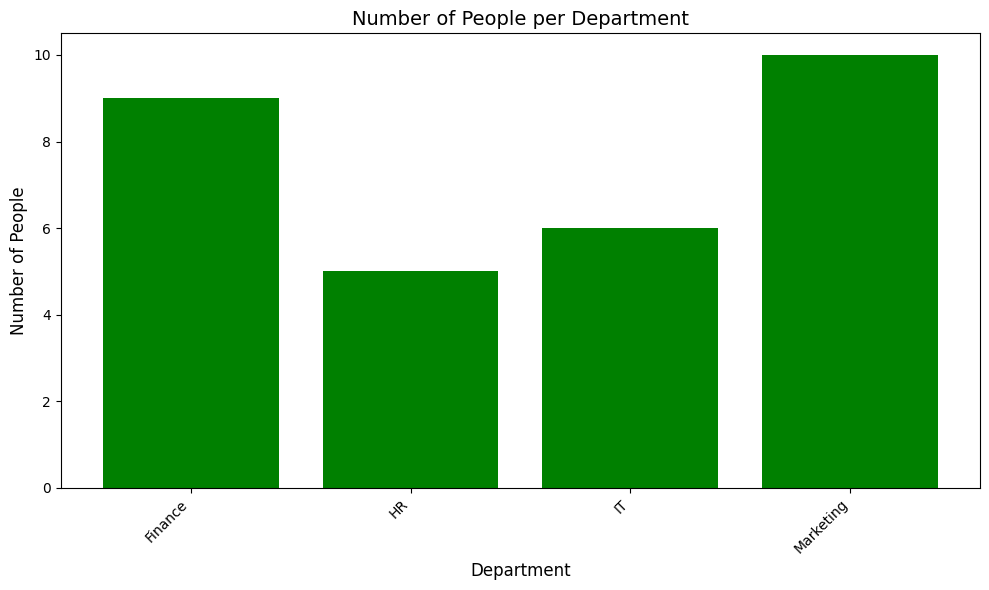

In [14]:
# Create a bar chart to visualize the number of people per department
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(department_counts['Department'], department_counts['count'], color='green')  # Create the bar chart

# Add labels and title
plt.xlabel('Department', fontsize=12)  # X-axis label
plt.ylabel('Number of People', fontsize=12)  # Y-axis label
plt.title('Number of People per Department', fontsize=14)  # Chart title

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot